In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
plt.style.use('classic')

In [3]:
def monte_carlo(K, M, S0 = 50, v = 0.30, r = 0.05, q = 0.00, T = 1, n = 250):
    dt = T/n
    ST_list = []
    for _ in range(M):
        paths = [S0]
        for i in range(n):
            Z = np.random.randn()
            S = paths[-1] * np.exp((r - q - (v**2)/2)*dt + v * Z * np.sqrt(dt))
            paths.append(S)
        ST_list.append(paths[-1])

        plt.plot(paths)
        plt.title(f'Monte Carlo Simulation ({M} paths)')
        plt.xlabel('Time')
        plt.ylabel('Price')

    V = np.array([max(0,ST_list[i]-K) for i in range(len(ST_list))])
    option_value = np.mean(V) * np.exp(-r * T)
    return [option_value, f'The call option with strike {K} = {option_value:.2f}']

In [4]:
def BSM_call_price(S0, K, T, r, q, v):
  d1 = (np.log(S0/K) + (r - q + v**2 /2)*T) / (v*np.sqrt(T))
  d2 = d1 - v*np.sqrt(T)
  price = S0*np.exp(-q*T)*stats.norm.cdf(d1) - K*np.exp(-r*T)*stats.norm.cdf(d2)
  return price

[9.494640518237132, 'The call option with strike 51 = 9.49']

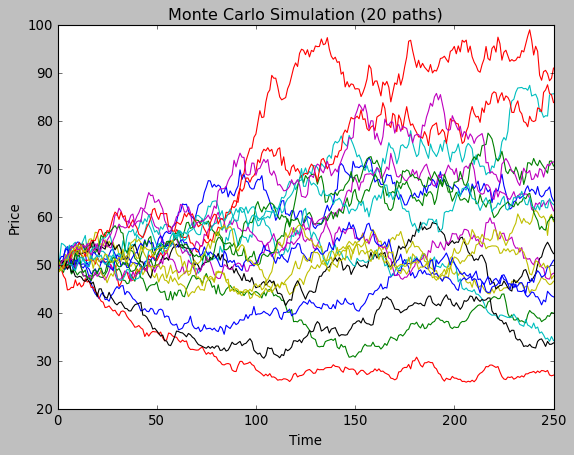

In [5]:
monte_carlo(K = 51, M = 20)

Error = 0.1630
BSM price = 6.64625253342582
Monte Carlo price = 6.8092164878848935


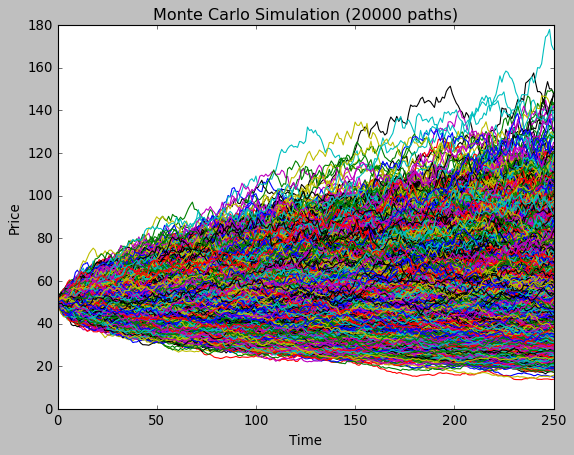

In [6]:
S0, v, r, q, T = 50, 0.30, 0.05, 0.00, 1
K = 51
M  = 20000
mc_price = monte_carlo(K, M)[0]
bsm_price = BSM_call_price(S0, K, T, r, q, v)
error = np.abs(mc_price - bsm_price)
print(f'Error = {error:.4f}\nBSM price = {bsm_price}\nMonte Carlo price = {mc_price}')

Error = 0.1308
BSM price = 6.64625253342582
Monte Carlo price = 6.515501356547419


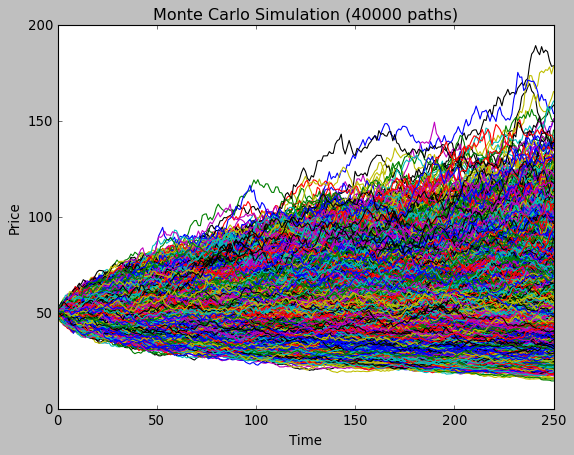

In [7]:
S0, v, r, q, T = 50, 0.30, 0.05, 0.00, 1
K = 51
M  = 40000
mc_price = monte_carlo(K, M)[0]
bsm_price = BSM_call_price(S0, K, T, r, q, v)
error = np.abs(mc_price - bsm_price)
print(f'Error = {error:.4f}\nBSM price = {bsm_price}\nMonte Carlo price = {mc_price}')

Error = 0.0195
BSM price = 6.64625253342582
Monte Carlo price = 6.626781244261726


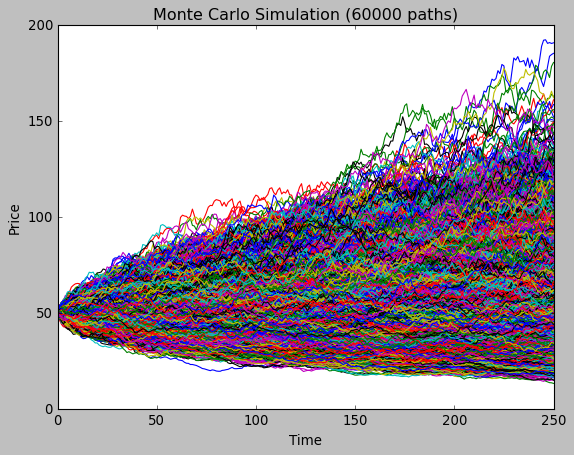

In [8]:
S0, v, r, q, T = 50, 0.30, 0.05, 0.00, 1
K = 51
M  = 60000
mc_price = monte_carlo(K, M)[0]
bsm_price = BSM_call_price(S0, K, T, r, q, v)
error = np.abs(mc_price - bsm_price)
print(f'Error = {error:.4f}\nBSM price = {bsm_price}\nMonte Carlo price = {mc_price}')